<h1> Cancer Mortality Exploration </h1>
<h2> Introduction </h2>

**Focus:** Explore how availability of health insurance coverage affects cancer mortality rates

The findings: <br/>

**1.** Counties with high **private** insurance coverage show negative correlation with cancer mortality <br/>
**2.** Somewhat counter-intuitively, counties with high **public** insurance coverage show positive correlation with death rates <br/>
**Hypothesis 1:** health insurance per se doesn't guarantee better survival rates <br/><br/>

**3.** Percent of public insurance coverage is strongly correlated with poverty rates<br/>
**4.** Percent of private insurance coverage is strongly correlated with median income<br/>
**Hypothesis 2:** the mortality rates have more to do with socio-economic factors than access to health insurance <br/>
**Hypothesis 3:** private insurance might cover more advanced procedures than public one, thus improving the outcome <br/><br/>

**Other Factors that might affect mortality:** <br/><br/>
**5.** Interesting relationship between incidence count and death rate. First, there's a positive correlation, foloowed by the slightly negative one. <br/>
**Hypothesis 4:** counties with higher incidence rates have allocated more resources to battle the disease, thus improving the outcomes <br/><br/>

**Ideas for further exploration:** <br/><br/>
**6.** Check how Employer-sponsored private insurance effects are different from the general private insurance pool <br/>
**7.** What are the effects of no insurance coverage? Double coverage (i.e., both private and public)? <br/>



<h3>Setup</h3>

Load the car library and cancer dataset

In [136]:
library(car)
cancer.df = read.csv("C:/Berkeley/W203/Lab 1/cancer.csv")

<h3>Dataset overview</h3>

In [137]:
str(cancer.df)
#str(cancer.df[,2:ncol(cancer.df)])

'data.frame':	3047 obs. of  30 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ avgAnnCount         : num  1397 173 102 427 57 ...
 $ medIncome           : int  61898 48127 49348 44243 49955 52313 37782 40189 42579 60397 ...
 $ popEst2015          : int  260131 43269 21026 75882 10321 61023 41516 20848 13088 843954 ...
 $ povertyPercent      : num  11.2 18.6 14.6 17.1 12.5 15.6 23.2 17.8 22.3 13.1 ...
 $ binnedInc           : Factor w/ 10 levels "(34218.1, 37413.8]",..: 9 6 6 4 6 7 2 2 3 8 ...
 $ MedianAge           : num  39.3 33 45 42.8 48.3 45.4 42.6 51.7 49.3 35.8 ...
 $ MedianAgeMale       : num  36.9 32.2 44 42.2 47.8 43.5 42.2 50.8 48.4 34.7 ...
 $ MedianAgeFemale     : num  41.7 33.7 45.8 43.4 48.9 48 43.5 52.5 49.8 37 ...
 $ Geography           : Factor w/ 3047 levels "Abbeville County, South Carolina",..: 1459 1460 1464 1589 1618 1766 2051 2112 2143 2185 ...
 $ AvgHouseholdSize    : num  2.54 2.34 2.62 2.52 2.34 2.58 2.42 2.24 2.38 2.65 ...
 $ PercentMarri

There are 3047 observations for 30 variables. The X variable is just a simple enumerator of entries so it can be ignored for the purposes of this analysis.
The majority of variables are numeric, with only two being categorical: Geography (with levels formatted as string of "County Name, State Name") and binnedInc, which is a label assigned to a bin covering a certain range of median income.

In [5]:
summary(cancer.df)

       X           avgAnnCount        medIncome        popEst2015      
 Min.   :   1.0   Min.   :    6.0   Min.   : 22640   Min.   :     827  
 1st Qu.: 762.5   1st Qu.:   76.0   1st Qu.: 38883   1st Qu.:   11684  
 Median :1524.0   Median :  171.0   Median : 45207   Median :   26643  
 Mean   :1524.0   Mean   :  606.3   Mean   : 47063   Mean   :  102637  
 3rd Qu.:2285.5   3rd Qu.:  518.0   3rd Qu.: 52492   3rd Qu.:   68671  
 Max.   :3047.0   Max.   :38150.0   Max.   :125635   Max.   :10170292  
                                                                       
 povertyPercent               binnedInc      MedianAge      MedianAgeMale  
 Min.   : 3.20   (45201, 48021.6]  : 306   Min.   : 22.30   Min.   :22.40  
 1st Qu.:12.15   (54545.6, 61494.5]: 306   1st Qu.: 37.70   1st Qu.:36.35  
 Median :15.90   [22640, 34218.1]  : 306   Median : 41.00   Median :39.60  
 Mean   :16.88   (42724.4, 45201]  : 305   Mean   : 45.27   Mean   :39.57  
 3rd Qu.:20.40   (48021.6, 51046.4]: 305   3

The summary() command shows that there are two variables that contain missing numbers: PctSomeCol18_24 (2285 NAs) and PctEmployed16_Over (152 NAs). The proportion of missing values is much higher for the first variable (~66%) vs. only ~5% for the second one. We might want to exclude PctSomeCol18_24 from our analysis. <br>
The Geography variable has value 1 assigned to 6 observations from different states and counties, while the rest of the data has unique values. It might indicate an error in data entry, especially since all 6 values begin with a letter 'A'. <br>
There is an obvious outlier in the MadianAge variable: its maximum value is set to 624 years! Reviewing separate median age variables for different genders, and looking at the distribution of values for MedianAge itself, we come to a conclusion that the most likely explanation is the missing decimal point. In other words, it should be 62.4. <br>
Exploring further the MedianAge variable, we find that there're 30 observations for which it exceeds 100 years old. Since we're not living in Biblical times anymore, it's a highly unlikely scenario. The most reasonable explanation is that the decimal point has been omitted during data entry.

In [192]:
nrow(cancer.df[cancer.df$MedianAge > 100,])
cancer.df[cancer.df$MedianAge > 100,]


[1] 30

,X,avgAnnCount,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
101,101,89,61802,17110,8.2,"(61494.5, 125635]",458.4,36.3,40.7,"Seward County, Nebraska",...,83.4,55.0,24.3,96.47606,0.35298270,0.4824097,1.19425815,60.49149,9.675646,152.3
182,182,564,56142,139394,12.6,"(54545.6, 61494.5]",469.2,37.6,40.1,"Sandoval County, New Mexico",...,63.8,43.1,35.9,69.97175,2.66250970,1.3839488,9.73448089,51.87666,5.497053,135.7
226,226,346,44207,62194,14.6,"(42724.4, 45201]",546.0,44.2,46.7,"Pittsylvania County, Virginia",...,66.2,42.6,36.2,74.84473,21.41765137,0.3423894,1.57658375,51.59136,4.194566,176.8
319,319,186,37122,25345,19.0,"(34218.1, 37413.8]",624.0,51.6,52.5,"Iosco County, Michigan",...,61.4,29.4,53.2,96.14582,0.62595961,0.5196646,0.14172670,48.10897,4.012841,193.4
426,426,230,45841,39259,18.7,"(45201, 48021.6]",508.8,41.5,43.4,"Person County, North Carolina",...,60.0,37.9,39.3,68.76624,27.37761703,0.4304416,1.53328919,45.40727,6.140351,198.1
607,607,35,36449,4251,17.3,"(34218.1, 37413.8]",619.2,52.3,50.7,"Mineral County, Montana",...,48.3,20.2,53.8,98.44266,0.07078811,0.1651723,0.14157622,46.76903,3.333333,188.8
638,638,140,66522,25512,6.9,"(61494.5, 125635]",498.0,40.4,42.4,"Cass County, Nebraska",...,83.0,55.4,24.4,96.81388,0.95425867,0.5638801,0.33911672,61.33661,7.938903,193.1
844,844,599,39927,128755,22.5,"(37413.8, 40362.7]",412.8,33.0,35.6,"Tangipahoa Parish, Louisiana",...,55.4,36.4,38.7,67.09115,29.71566549,0.7658225,0.36259025,45.45654,3.432793,207.1
992,992,85,61762,19162,9.6,"(61494.5, 125635]",481.2,39.4,41.4,"Greene County, Virginia",...,69.7,50.3,26.1,88.44651,6.58464463,1.2408913,1.01911501,58.64154,3.450672,156.5
1200,1200,959,41010,201410,18.8,"(40362.7, 42724.4]",424.8,34.2,36.8,"Harrison County, Mississippi",...,57.5,32.6,35.9,69.41070,23.27327939,3.0412497,1.08015570,41.83074,5.131499,206.7


<h3>Select variables for exploration</h3>

 Variable Name  |  Description 
--------- | ---------------
deathRate | 
avgAnnCount | 2009-2013 mean incidences per county
popEst2015 | Estimated population by county 2015
PctPrivateCoverage | Percentage of the population with private insurance coverage
PctPublicCoverage | Percentage of the population with public insurance coverage
PctEmpPrivCoverage | Percentage of the population with private insurance coverage through employment
povertyPercent | Percent of population below poverty line
MedianAge | Median population age
medIncome | Median Income

Generate a scatterplot for the selected set of variables

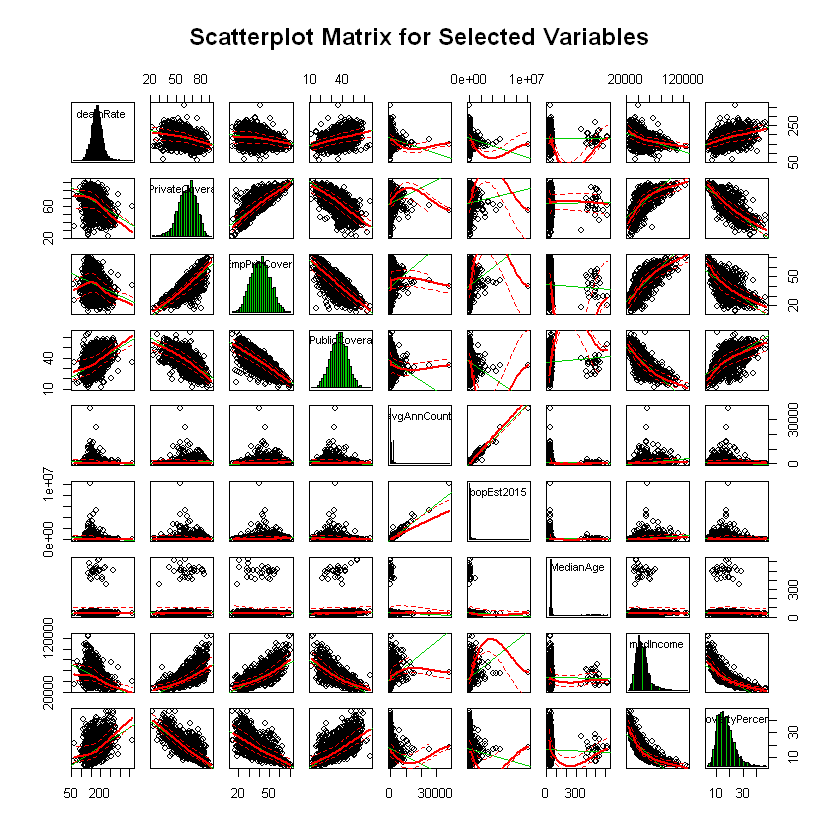

In [8]:
scatterplotMatrix( ~ deathRate + PctPrivateCoverage + PctEmpPrivCoverage + PctPublicCoverage+avgAnnCount+popEst2015 + MedianAge + medIncome +povertyPercent, diagonal="histogram",data = cancer.df,
                   main = "Scatterplot Matrix for Selected Variables")

From the matrix we can derive the following observations: <br>
** 1. ** The following variables have close to normal distributions: deathRate, all three types of insurance coverage <br>
** 2. ** Positively skewed distributions: povertyPercent, medIncome <br>
** 3. ** Extremely right-skewed distributions: avgAnnCount, popEst2015, MedianAge. They are the candidates for log() transformation. <br> <br>
** 4. ** deathRate is negatively correlated with: PctPrivateCoverage, PctEmpPrivCoverage, medIncome <br>
** 5. ** deathRate is positively correlated with: PctPublicCoverage, povertyPercent <br>
** 6. ** Relationships between deathRate and avgAnnCount, popEst2015, MedianAge require further investigation

In [195]:
nrow(cancer.df[(cancer.df$PctPublicCoverage + cancer.df$PctPrivateCoverage)>100,])
nrow(cancer.df[(cancer.df$PctPublicCoverage + cancer.df$PctPrivateCoverage)<100,])

cancer.df$PctDoubleCoverage=cancer.df$PctPublicCoverage + cancer.df$PctPrivateCoverage - 100
cancer.df$PctDoubleCoverage[cancer.df$PctDoubleCoverage < 0] = 0
summary(cancer.df$PctDoubleCoverage)

cancer.df$PctNoCoverage = 100 - cancer.df$PctPublicCoverage - cancer.df$PctPrivateCoverage
cancer.df$PctNoCoverage[cancer.df$PctNoCoverage < 0] = 0
summary(cancer.df$PctNoCoverage)

[1] 1722

[1] 1313

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.300   3.203   5.800  31.700 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   2.595   3.750  34.600 

<h2>Univariate Analysis of Key Variables</h2>

<h3>deathRate Variable</h3>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   59.7   161.2   178.1   178.7   195.2   362.8 

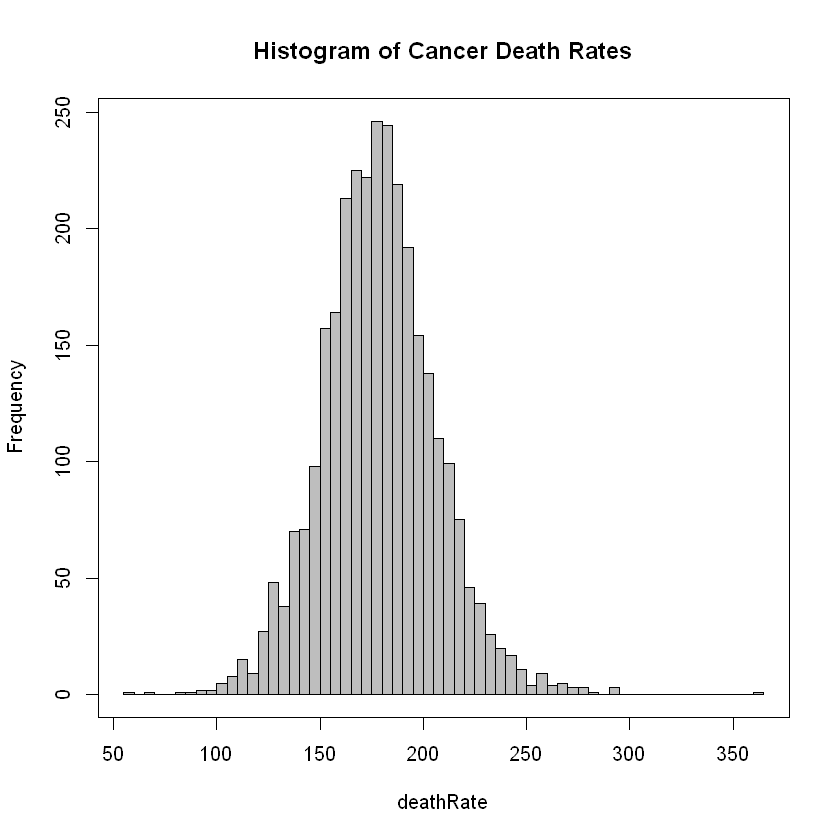

In [12]:
summary(cancer.df$deathRate)
#hist(cancer.df$deathRate)
with(cancer.df, hist(deathRate, breaks="FD", col = "gray", main="Histogram of Cancer Death Rates"))
box()

Explore the outliers

In [56]:
cancer.df[cancer.df$deathRate > 300,]

,X,avgAnnCount,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
1490,1490,214,40207,15234,24.3,"(37413.8, 40362.7]",40.3,42.3,36.9,"Union County, Florida",...,59.6,41,35.8,73.96485,21.59173,0.6451188,1.533803,50.01288,3.739774,362.8


There is only one record for the maximum value, and the other variables in this observation don't seem to stand out in any way. We need to re-visit this when we have more information.

In [15]:
cancer.df[cancer.df$deathRate < 90,]

,X,avgAnnCount,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
1066,1066,138,76661,53605,7.8,"(61494.5, 125635]",35.6,35.4,35.7,"Eagle County, Colorado",...,72.2,46.9,15.7,88.54991,0.65999696,1.0480067,7.471089,54.29372,4.860486,80.8
1094,1094,64,73274,17787,7.0,"(61494.5, 125635]",43.4,43.7,43.4,"Pitkin County, Colorado",...,75.1,41.6,19.1,94.44317,1.52698048,1.4408726,1.136625,35.70674,5.170657,59.7
1403,1403,66,68352,30257,9.7,"(61494.5, 125635]",37.1,36.5,38.5,"Summit County, Colorado",...,68.3,39.6,16.5,89.67519,1.15411196,0.9329648,5.946786,49.62043,6.966359,87.6
1942,1942,21,34258,6876,21.8,"(34218.1, 37413.8]",41.0,38.9,42.3,"Presidio County, Texas",...,35.2,25.2,36.1,91.31982,0.01369113,3.4364732,3.162651,49.73424,6.324111,66.3


There is one outlier that stands out on the left side of the histogram: observation 1942. Unlike other three records with low death rate, this one has relatively high poverty rate, relatively low percentage of private insurance coverage, and relatively high percent with public insurance. These attributes are usually associated with higher detha rates. <br>
One of the possible explanations is that this county has very low incidence rate of the disease, thus affecting the cancer mortality.

<h3>PctPrivateCoverage Variable</h3>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  22.30   57.20   65.10   64.35   72.10   92.30 

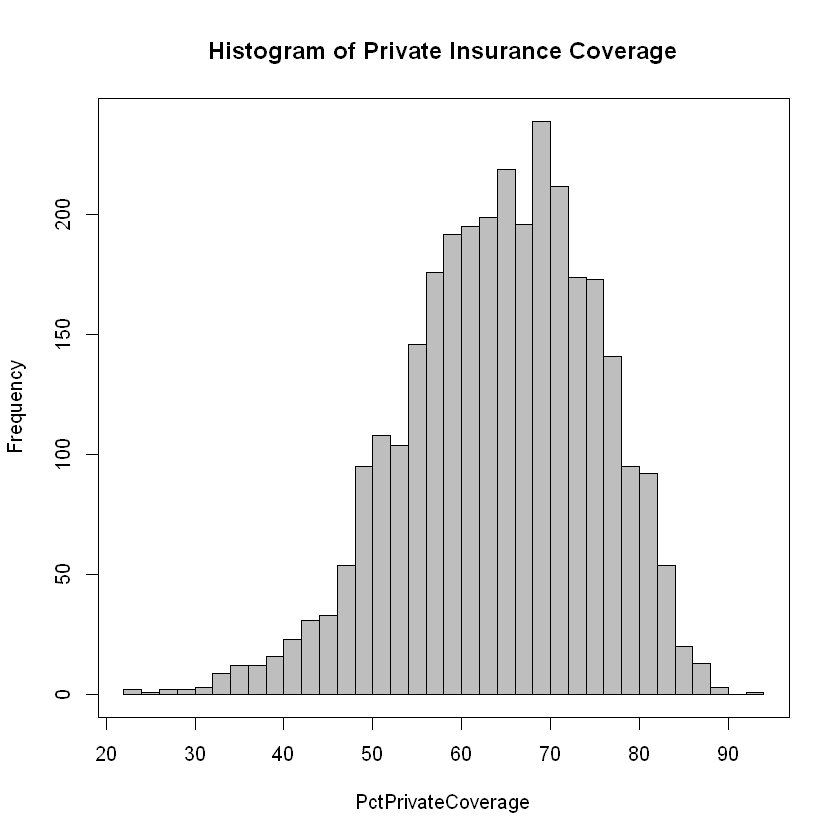

In [50]:
summary(cancer.df$PctPrivateCoverage)
with(cancer.df, hist(PctPrivateCoverage, breaks="FD", col = "gray", main="Histogram of Private Insurance Coverage"))
box()

There is a slight skew to the left, but otherwise the distribution is close to normal. The range of valid values is bound by 0 and 100.

Let's explore the rightmost outlier

In [52]:
str(cancer.df[cancer.df$PctPrivateCoverage > 90,])

'data.frame':	1 obs. of  30 variables:
 $ X                   : int 260
 $ avgAnnCount         : num 55
 $ medIncome           : int 125635
 $ popEst2015          : int 13892
 $ povertyPercent      : num 3.2
 $ binnedInc           : Factor w/ 10 levels "(34218.1, 37413.8]",..: 9
 $ MedianAge           : num 37.7
 $ MedianAgeMale       : num 37.1
 $ MedianAgeFemale     : num 38.6
 $ Geography           : Factor w/ 3047 levels "Abbeville County, South Carolina",..: 870
 $ AvgHouseholdSize    : num 2.57
 $ PercentMarried      : num 55.3
 $ PctNoHS18_24        : num 4.1
 $ PctHS18_24          : num 17.5
 $ PctSomeCol18_24     : num NA
 $ PctBachDeg18_24     : num 37.5
 $ PctHS25_Over        : num 7.5
 $ PctBachDeg25_Over   : num 34.4
 $ PctEmployed16_Over  : num 72
 $ PctUnemployed16_Over: num 4.2
 $ PctPrivateCoverage  : num 92.3
 $ PctEmpPrivCoverage  : num 70.7
 $ PctPublicCoverage   : num 13.5
 $ PctWhite            : num 77.6
 $ PctBlack            : num 2.13
 $ PctAsian            : 

There's only one record in this range. High median income (> $125K), low poverty percent (3.2), of people with private insurance 70.7\% are sponsored by their employer. The deathRate is relatively low (within the first quartile of the overall variable distribution).

<h3>PctEmpPrivCoverage   Variable</h3>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   13.5    34.5    41.1    41.2    47.7    70.7 

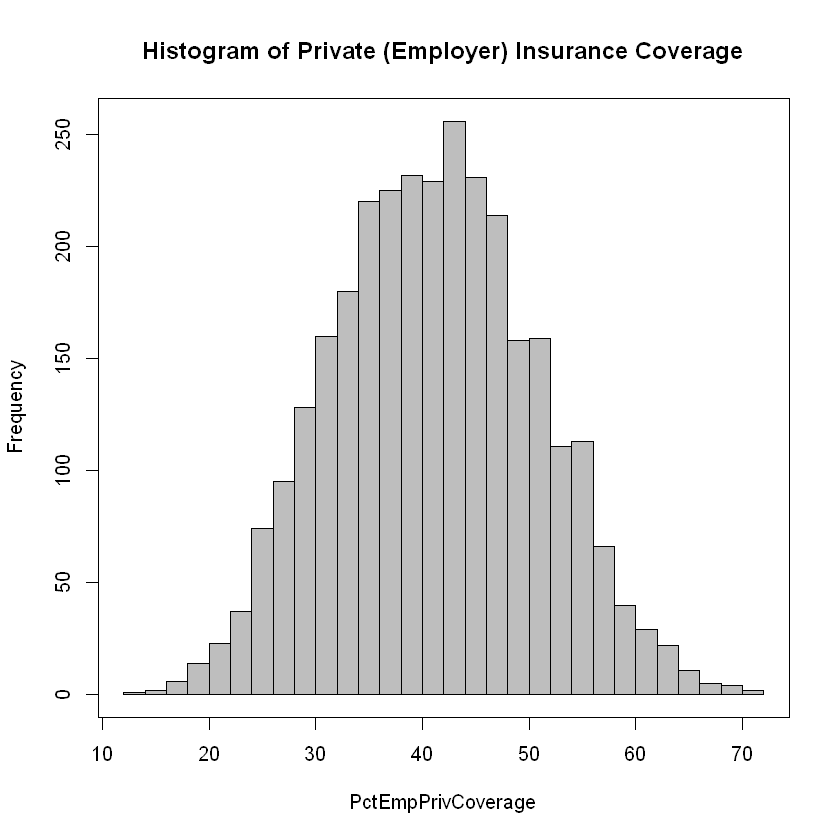

In [54]:
summary(cancer.df$PctEmpPrivCoverage  )
with(cancer.df, hist(PctEmpPrivCoverage  , breaks="FD", col = "gray", main="Histogram of Private (Employer) Insurance Coverage"))
box()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.20   30.90   36.30   36.25   41.55   65.10 

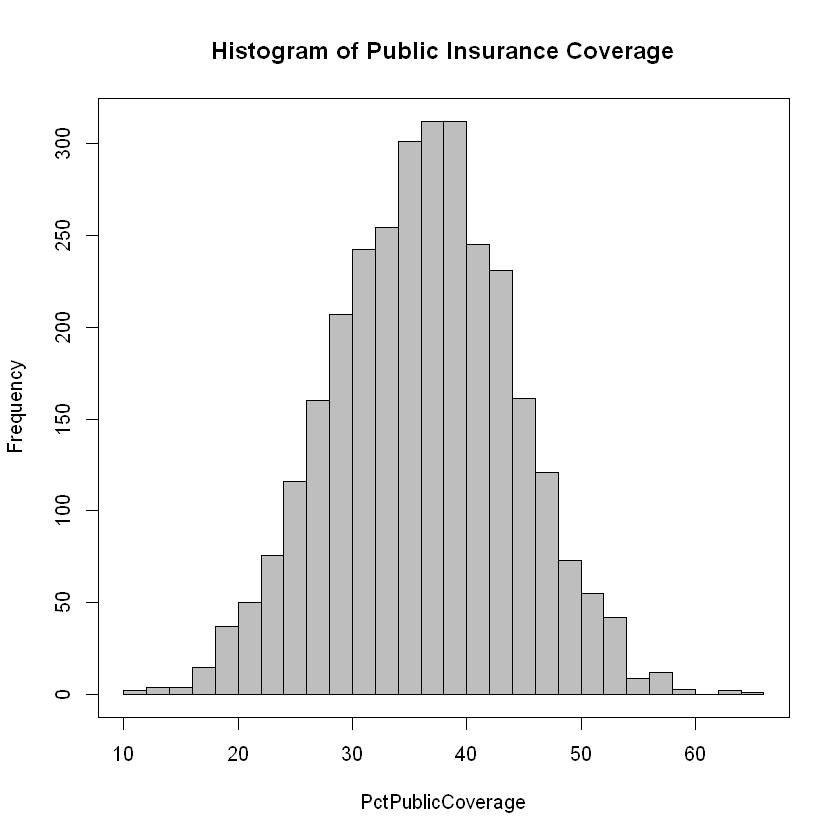

In [53]:
summary(cancer.df$PctPublicCoverage)
with(cancer.df, hist(PctPublicCoverage, breaks="FD", col = "gray", main="Histogram of Public Insurance Coverage"))
box()

<h3>povertyPercent Variable</h3>

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.20   12.15   15.90   16.88   20.40   47.40 

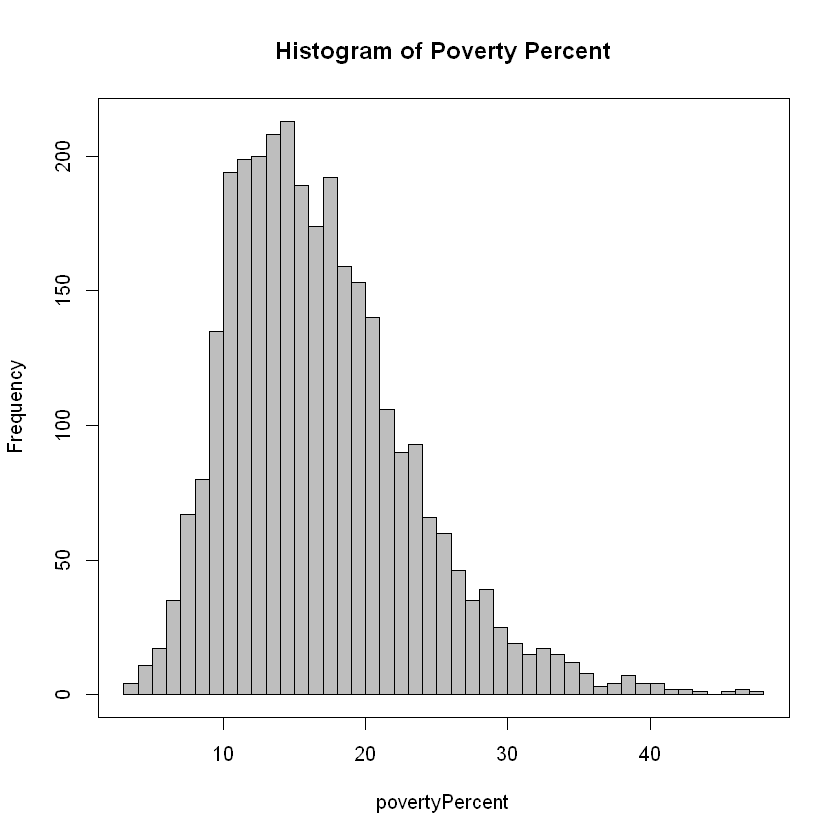

In [57]:
summary(cancer.df$povertyPercent)
with(cancer.df, hist(povertyPercent, breaks="FD", col = "gray", main="Histogram of Poverty Percent"))
box()

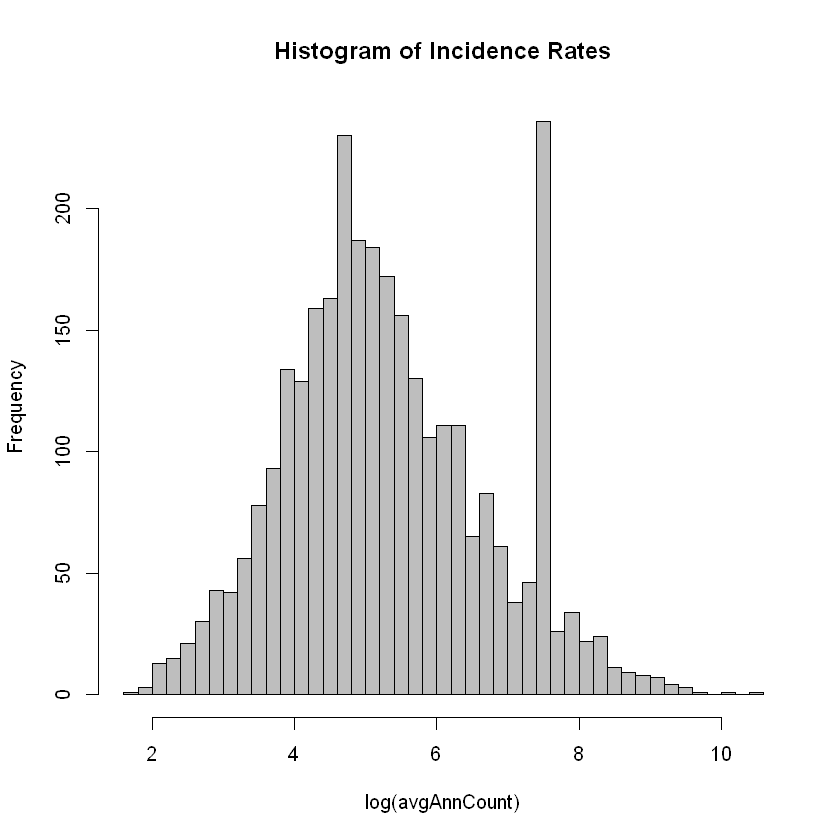

In [28]:
with(cancer.df, hist(log(avgAnnCount), breaks="FD", col = "gray", main="Histogram of Incidence Rates"))

In [139]:
#cancer.df[(log(cancer.df$avdAnnCount) < 7.6) & (log(cancer.df$avdAnnCount) >= 7.4),]
avgCount.2=log(cancer.df$avgAnnCount) < 7.6 & log(cancer.df$avgAnnCount) >= 7.4
unique(cancer.df[avgCount.2,]$avgAnnCount)

#summary(cancer.df[cancer.df$avgAnnCount == 1962.667684,])
#head(cancer.df[cancer.df$avgAnnCount == 1962.667684,], 50)
#summary(cancer.df$avgAnnCount)
#cancer.df[1:30,]$avgAnnCount
#class(cancer.df$avgAnnCount)

#TODO
#set values 1962.667684 to NA
cancer.df$avgAnnCount[cancer.df$avgAnnCount==1962.667684] = NA
summary(cancer.df$avgAnnCount)

[1]   NA 1758 1691 1997 1673 1775 1825 1859 1662 1860 1908 1885 1892 1948 1912
[16] 1869 1940 1976 1780 1721 1653 1813 1931 1760 1929 1715 1882 1757

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      6      71     153     508     396   38150     206 

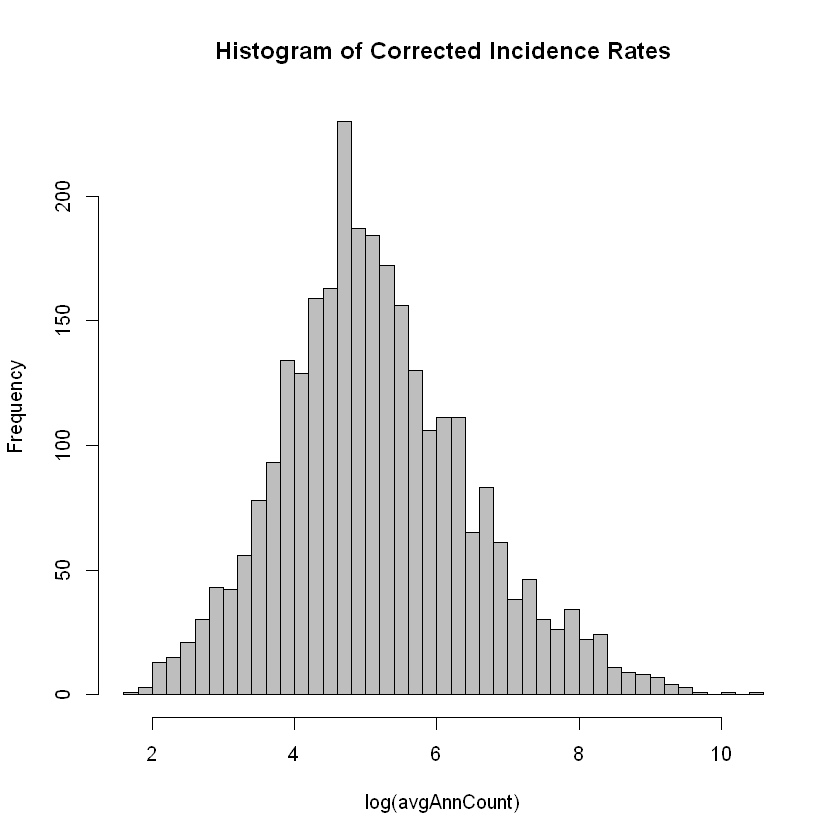

In [196]:
with(cancer.df, hist(log(avgAnnCount), breaks="FD", col = "gray", main="Histogram of Corrected Incidence Rates"))

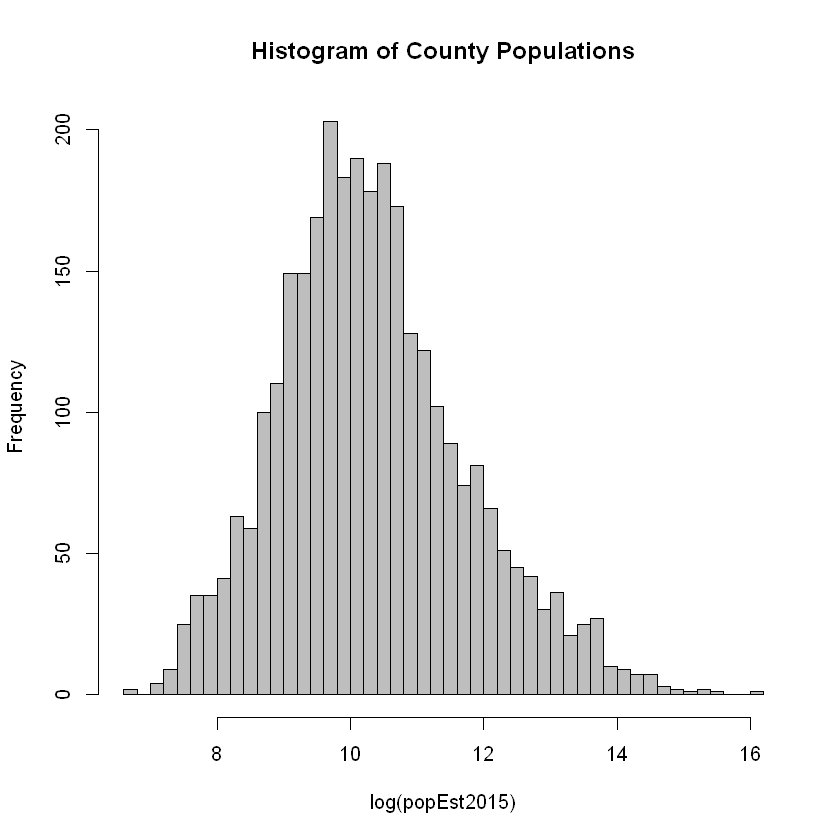

In [26]:
with(cancer.df, hist(log(popEst2015), breaks="FD", col = "gray", main="Histogram of County Populations"))

<h2>Analysis of Key Relationships</h2>

[1] -0.3860655

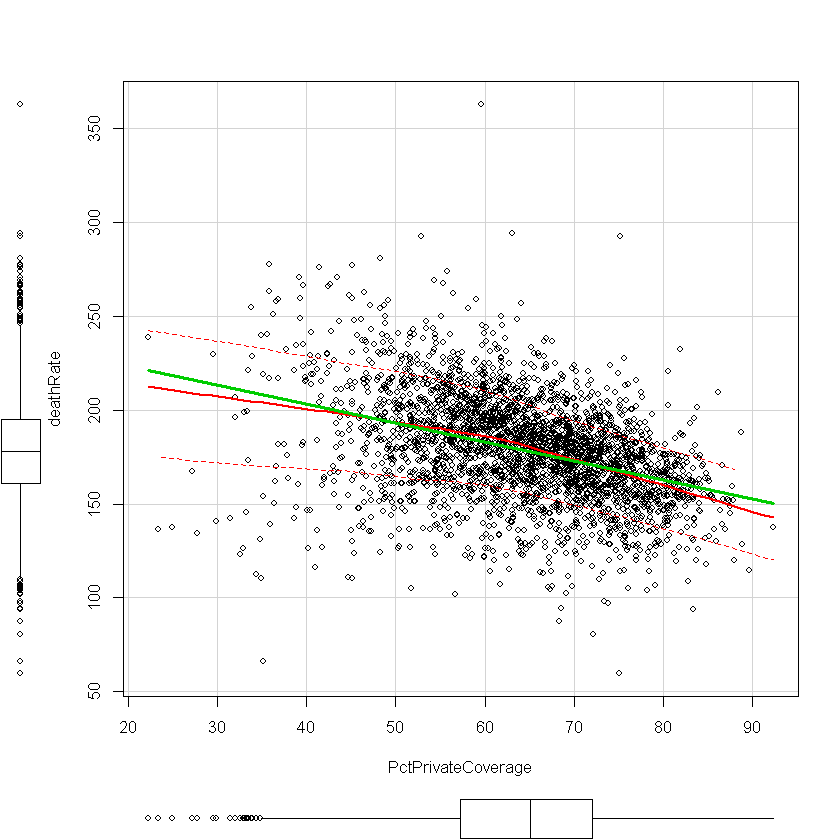

In [58]:
cor(cancer.df$deathRate, cancer.df$PctPrivateCoverage)
scatterplot(deathRate ~ PctPrivateCoverage, span=0.7, lwd=3, id.n=0, data=cancer.df)

[1] -0.2673994

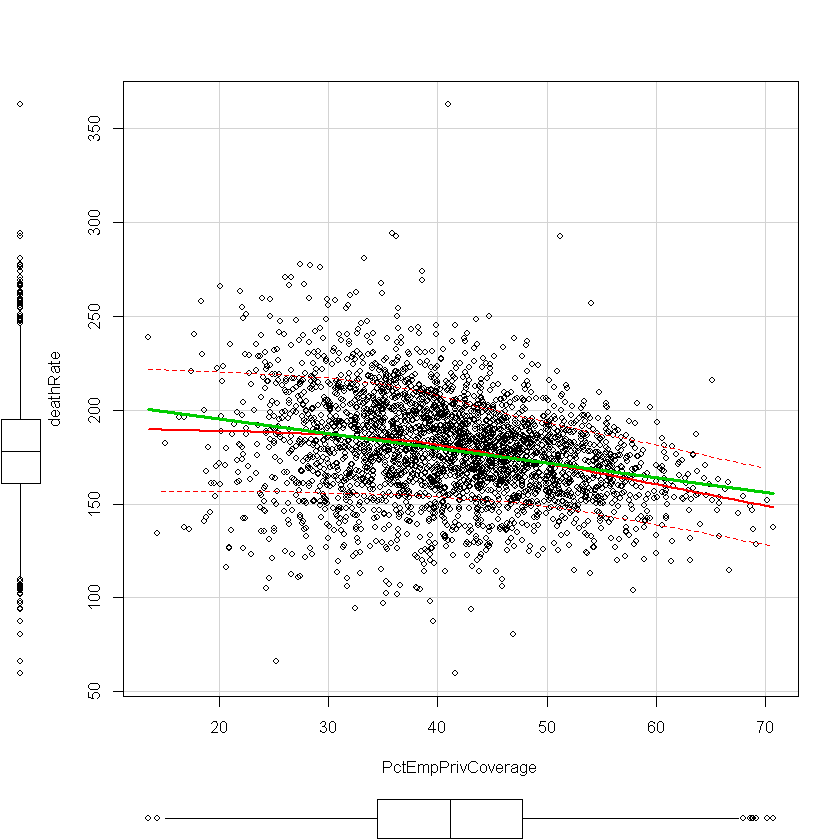

In [60]:
cor(cancer.df$deathRate, cancer.df$PctEmpPrivCoverage )
scatterplot(deathRate ~ PctEmpPrivCoverage , span=0.7, lwd=3, id.n=0, data=cancer.df)

[1] 0.4045717

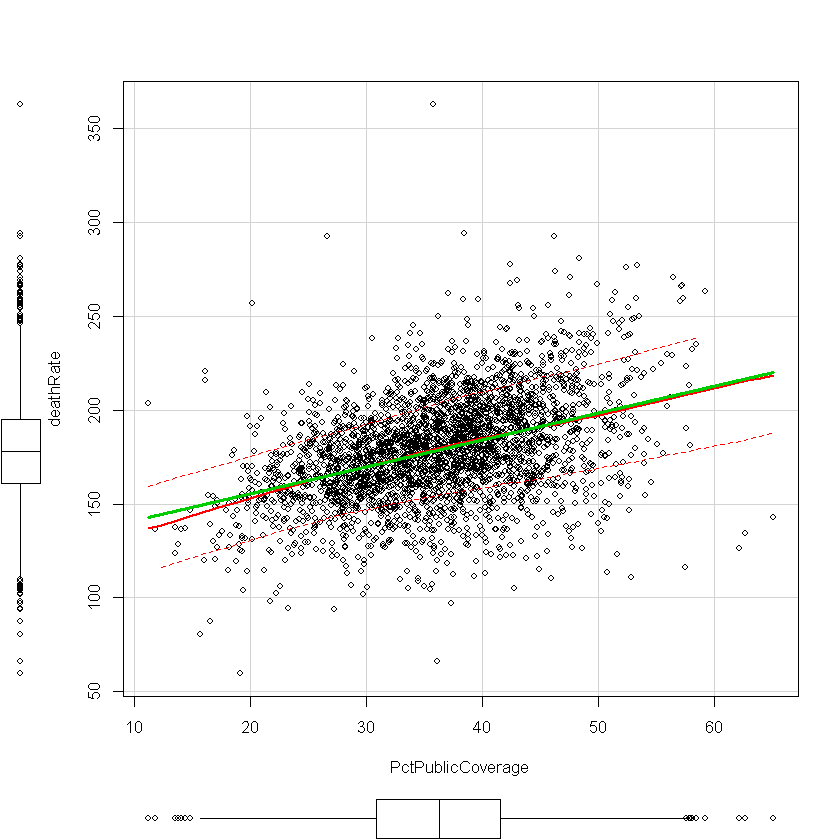

In [59]:
cor(cancer.df$deathRate, cancer.df$PctPublicCoverage)
scatterplot(deathRate ~ PctPublicCoverage, span=0.7, lwd=3, id.n=0, data=cancer.df)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.70   26.80   33.00   33.05   39.25   62.70 

[1] 0.4664147

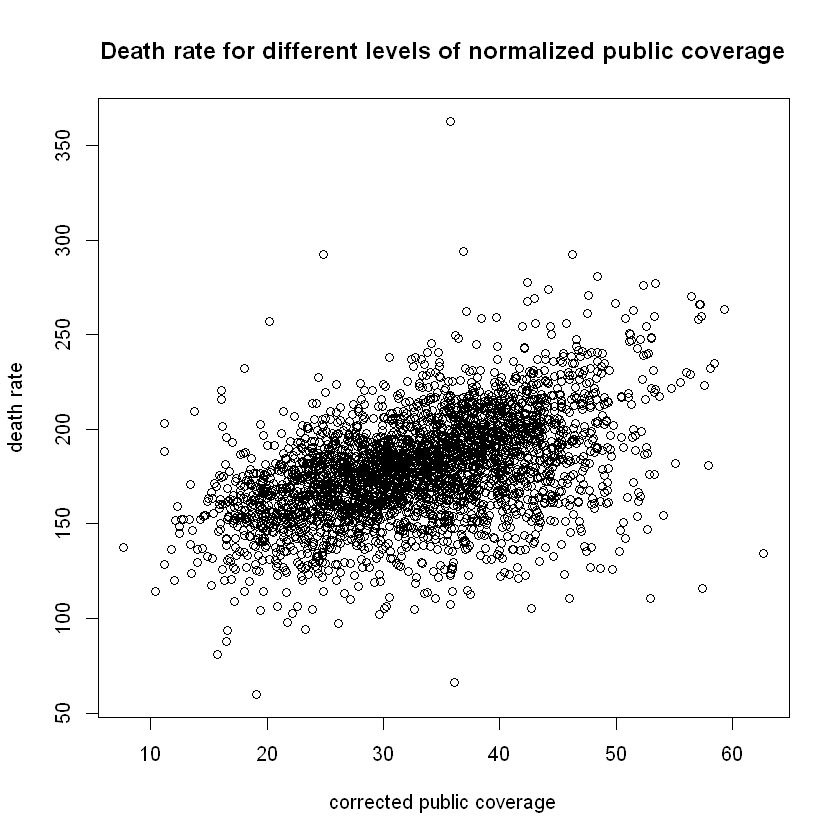

In [223]:
summary(cancer.df$PctPublicCoverage - cancer.df$PctDoubleCoverage)
cor(cancer.df$deathRate, cancer.df$PctPublicCoverage - cancer.df$PctDoubleCoverage)
#scatterplot(deathRate ~ log(PctPublicCoverage-PctDoubleCoverage), span=0.7, lwd=3, id.n=0, data=cancer.df)
plot(jitter((cancer.df$PctPublicCoverage - cancer.df$PctDoubleCoverage), factor=2), jitter(cancer.df$deathRate, factor=2),  
     xlab = "corrected public coverage", ylab = "death rate", 
     main = "Death rate for different levels of normalized public coverage")
abline(lm((cancer.df$PctPublicCoverage - cancer.df$PctDoubleCoverage) ~ cancer.df$deathRate))

[1] 0.01573735

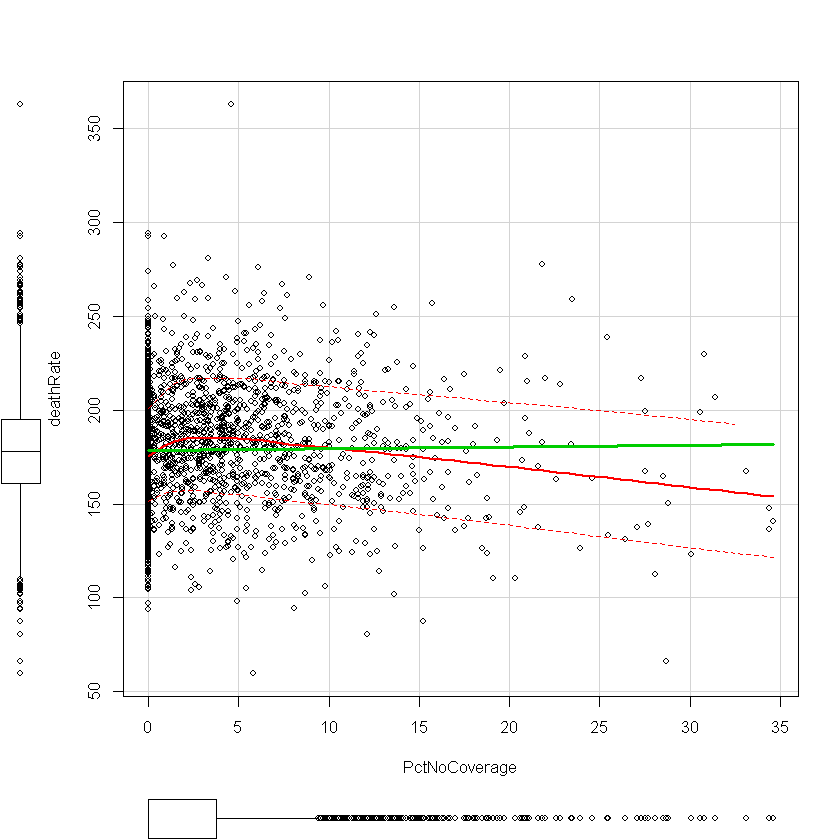

In [203]:
cor(cancer.df$deathRate, cancer.df$PctNoCoverage)
scatterplot(deathRate ~ PctNoCoverage, span=0.7, lwd=3, id.n=0, data=cancer.df)

[1] -0.4232724

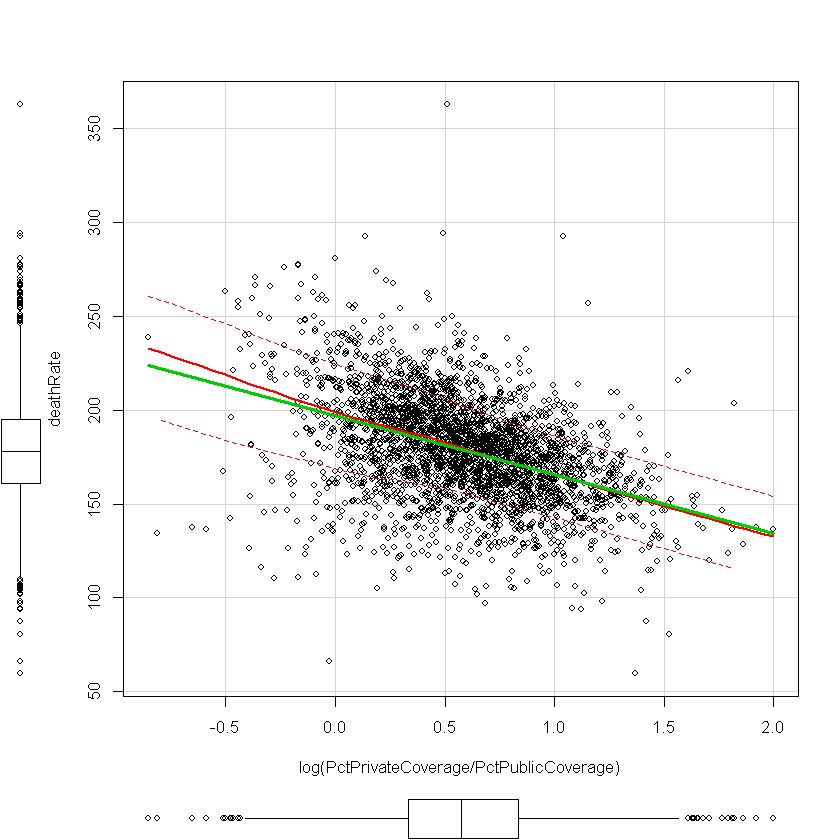

In [70]:
cor(cancer.df$deathRate, log(cancer.df$PctPrivateCoverage / cancer.df$PctPublicCoverage))
scatterplot(deathRate ~ log(PctPrivateCoverage / PctPublicCoverage), span=0.7, lwd=3, id.n=0, data=cancer.df)
#summary(cancer.df$PctPrivateCoverage / cancer.df$PctPublicCoverage)
#hist(cancer.df$PctPrivateCoverage / cancer.df$PctPublicCoverage)
#plot(log(cancer.df$PctPrivateCoverage / cancer.df$PctPublicCoverage), cancer.df$deathRate)

[1] 0.429389

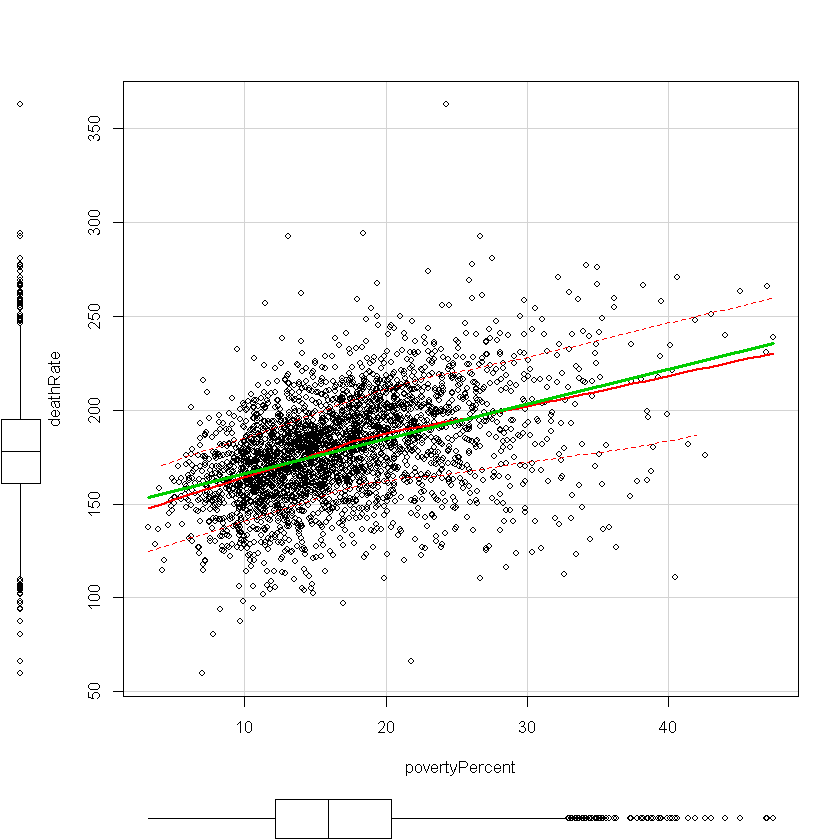

In [71]:
cor(cancer.df$deathRate, cancer.df$povertyPercent)
scatterplot(deathRate ~ povertyPercent, span=0.7, lwd=3, id.n=0, data=cancer.df)

[1] 0.6511621

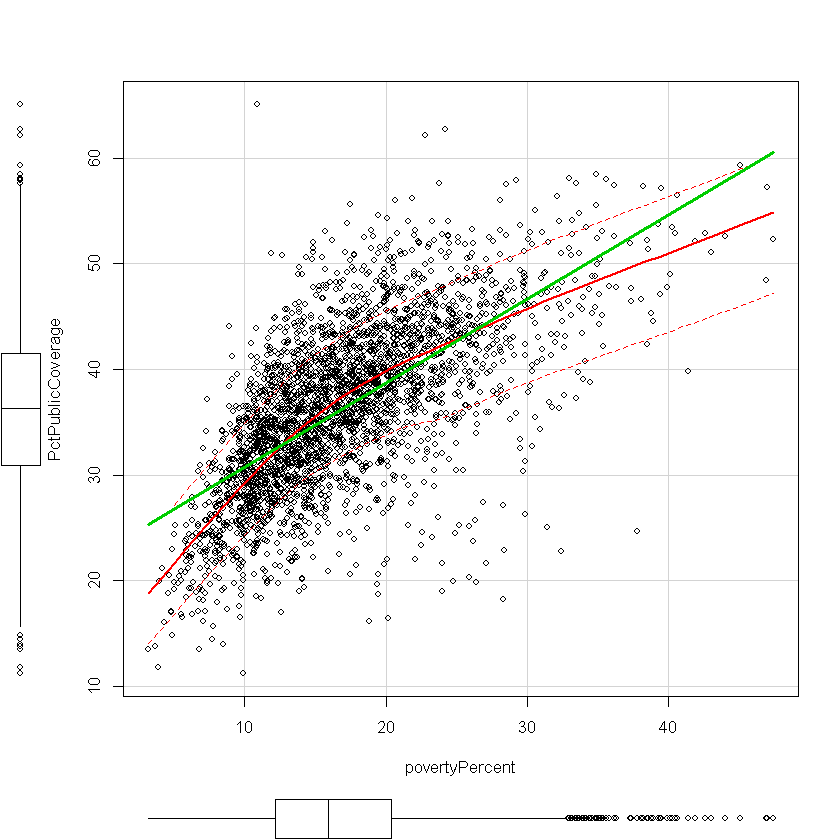

In [72]:
cor(cancer.df$PctPublicCoverage, cancer.df$povertyPercent)
scatterplot(PctPublicCoverage ~ povertyPercent, span=0.7, lwd=3, id.n=0, data=cancer.df)

[1] "[22.2,45.6]" "(45.6,69]"   "(69,92.4]"

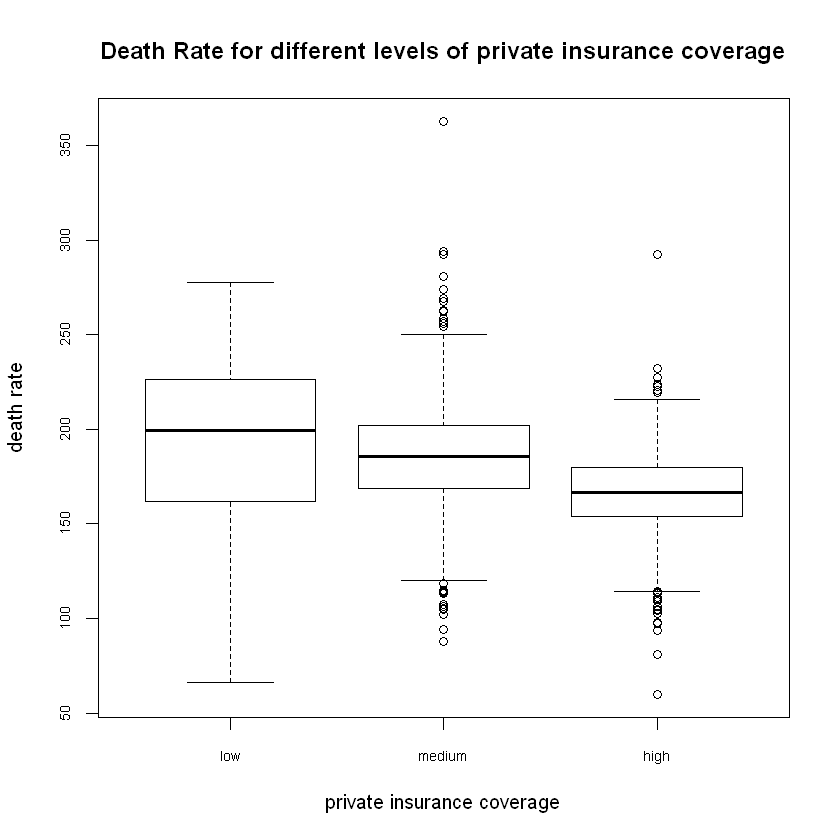

In [98]:
levels(cut(cancer.df$PctPrivateCoverage, 3, include.lowest=TRUE))
#levels(cut(cancer.df$PctPrivateCoverage, quantile(cancer.df$PctPrivateCoverage, c(0, 1/3, 2/3, 1)), include.lowest=TRUE))
#boxplot(deathRate ~ cut(PctPrivateCoverage, 3), data = cancer.df,
boxplot(deathRate ~ cut(PctPrivateCoverage, 3, include.lowest=TRUE, labels=c("low", "medium", "high")), 
        data = cancer.df,
        cex.axis = .7,
        main = "Death Rate for different levels of private insurance coverage",
        xlab = "private insurance coverage", ylab = "death rate")

[1] "[11.1,29.2]" "(29.2,47.1]" "(47.1,65.2]"

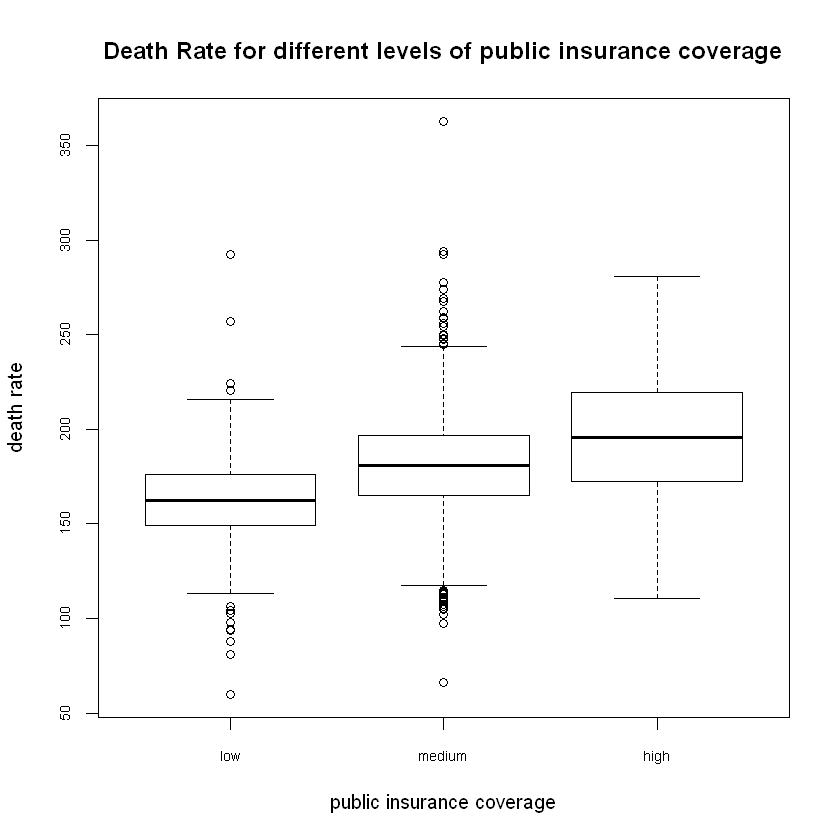

In [100]:
levels(cut(cancer.df$PctPublicCoverage, 3, include.lowest=TRUE))
boxplot(deathRate ~ cut(PctPublicCoverage, 3, include.lowest=TRUE, labels=c("low", "medium", "high")), 
        data = cancer.df,
        cex.axis = .7,
        main = "Death Rate for different levels of public insurance coverage",
        xlab = "public insurance coverage", ylab = "death rate")

[1] "[-0.0346,11.5]" "(11.5,23.1]"    "(23.1,34.6]"

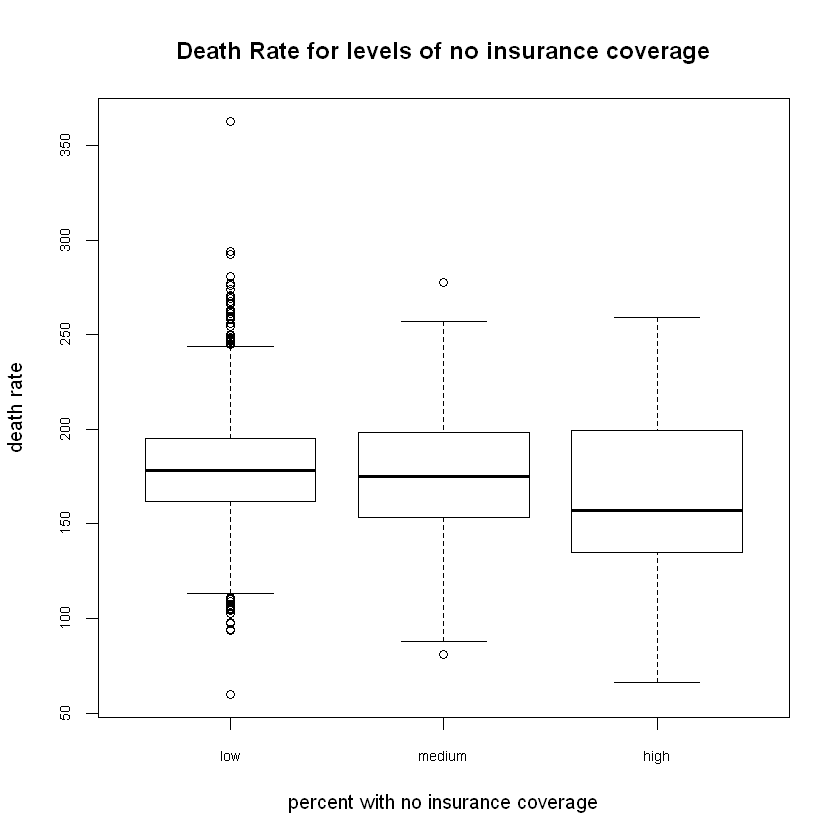

In [216]:
levels(cut(cancer.df$PctNoCoverage, 3, include.lowest=TRUE))
boxplot(deathRate ~ cut(PctNoCoverage, 3, include.lowest=TRUE, labels=c("low", "medium", "high")), 
        data = cancer.df,
        cex.axis = .7,
        main = "Death Rate for levels of no insurance coverage",
        xlab = "percent with no insurance coverage", ylab = "death rate")

[1] "[-0.0317,10.6]" "(10.6,21.1]"    "(21.1,31.7]"

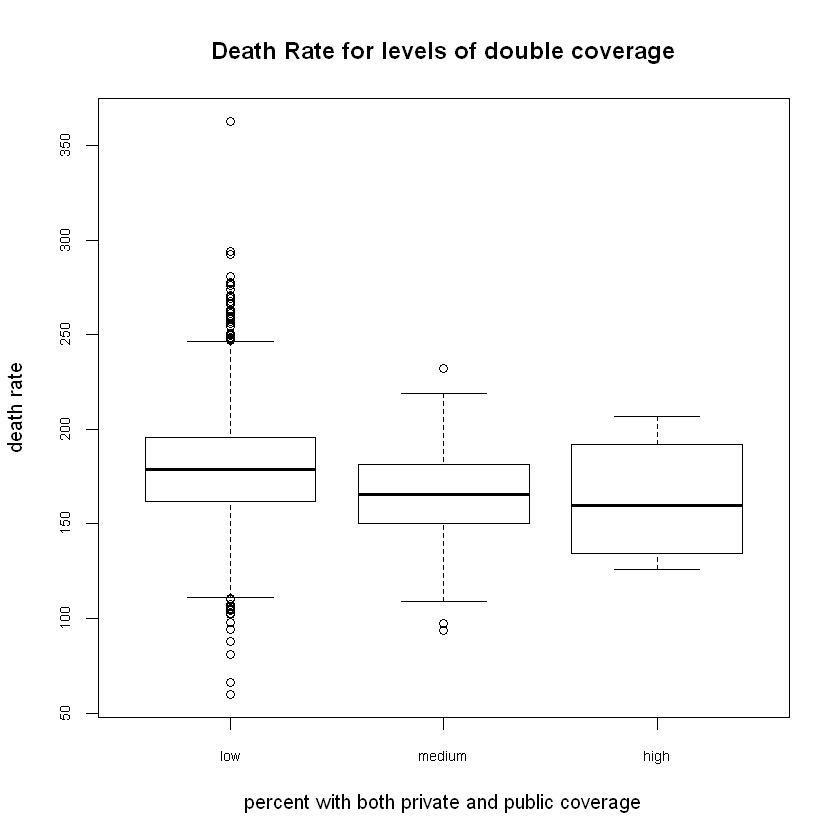

In [219]:
levels(cut(cancer.df$PctDoubleCoverage, 3, include.lowest=TRUE))
boxplot(deathRate ~ cut(PctDoubleCoverage, 3, include.lowest=TRUE, labels=c("low", "medium", "high")), 
        data = cancer.df,
        cex.axis = .7,
        main = "Death Rate for levels of double coverage",
        xlab = "percent with both private and public coverage", ylab = "death rate")

[1] "[3.16,17.9]" "(17.9,32.7]" "(32.7,47.4]"

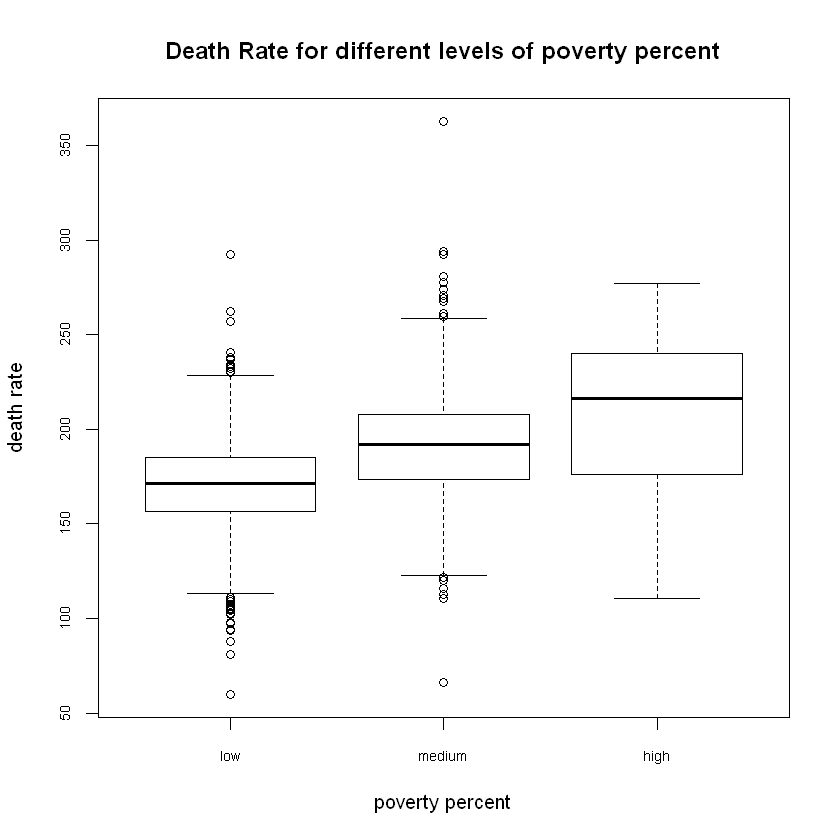

In [102]:
levels(cut(cancer.df$povertyPercent, 3, include.lowest=TRUE))
boxplot(deathRate ~ cut(povertyPercent, 3, include.lowest=TRUE, labels=c("low", "medium", "high")), 
        data = cancer.df,
        cex.axis = .7,
        main = "Death Rate for different levels of poverty percent",
        xlab = "poverty percent", ylab = "death rate")

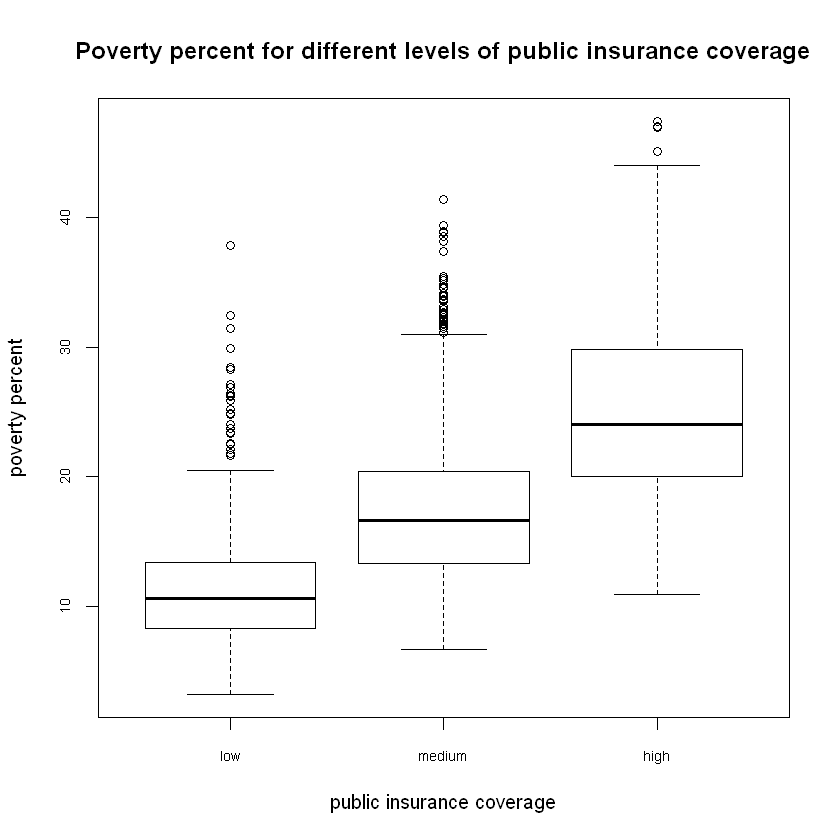

In [101]:
boxplot(povertyPercent ~ cut(PctPublicCoverage, 3, include.lowest=TRUE, labels=c("low", "medium", "high")), 
        data = cancer.df,
        cex.axis = .7,
        main = "Poverty percent for different levels of public insurance coverage",
        xlab = "public insurance coverage", ylab = "poverty percent")

<h2>Analysis of Secondary Effects</h2>

[1] "(34218.1, 37413.8]" "(37413.8, 40362.7]" "(40362.7, 42724.4]"
 [4] "(42724.4, 45201]"   "(45201, 48021.6]"   "(48021.6, 51046.4]"
 [7] "(51046.4, 54545.6]" "(54545.6, 61494.5]" "(61494.5, 125635]" 
[10] "[22640, 34218.1]"

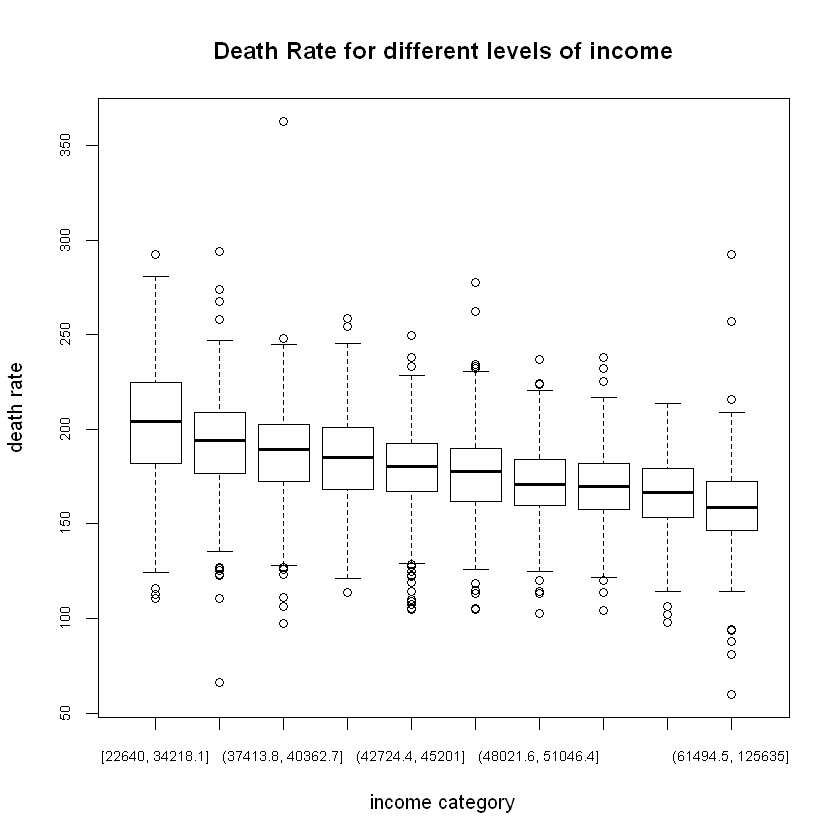

In [81]:
levels(cancer.df$binnedInc)
cancer.df$binnedInc=relevel(cancer.df$binnedInc, '[22640, 34218.1]')
boxplot(deathRate ~ binnedInc, data = cancer.df,
        cex.axis = .7,
        main = "Death Rate for different levels of income",
        xlab = "income category", ylab = "death rate")

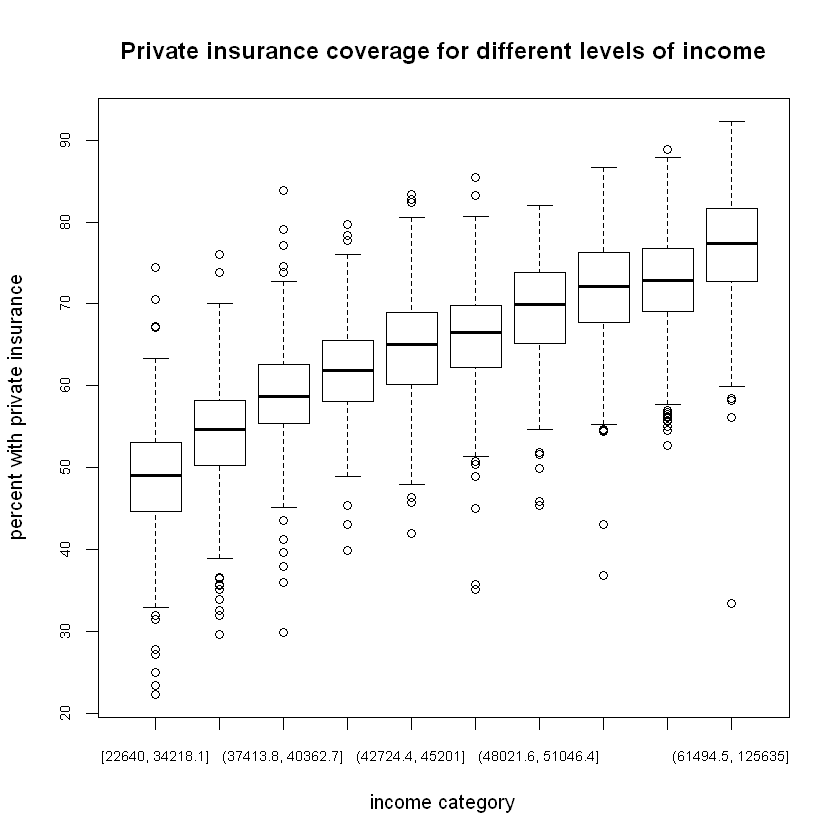

In [82]:
boxplot(PctPrivateCoverage ~ binnedInc, data = cancer.df,
        cex.axis = .7,
        main = "Private insurance coverage for different levels of income",
        xlab = "income category", ylab = "percent with private insurance")

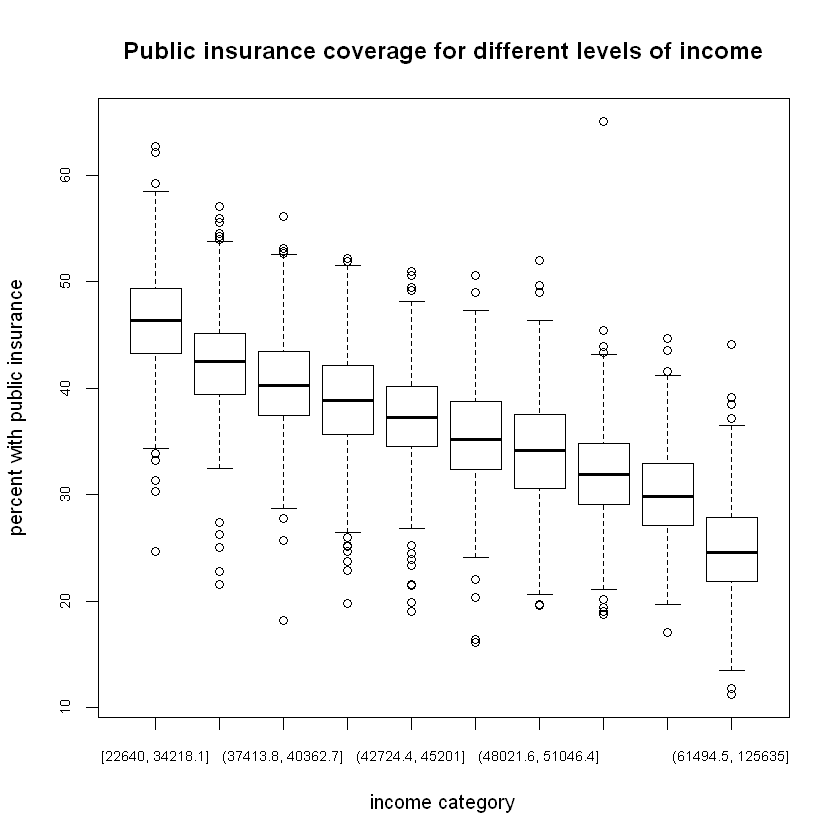

In [83]:
boxplot(PctPublicCoverage ~ binnedInc, data = cancer.df,
        cex.axis = .7,
        main = "Public insurance coverage for different levels of income",
        xlab = "income category", ylab = "percent with public insurance")

[1] -0.04059046

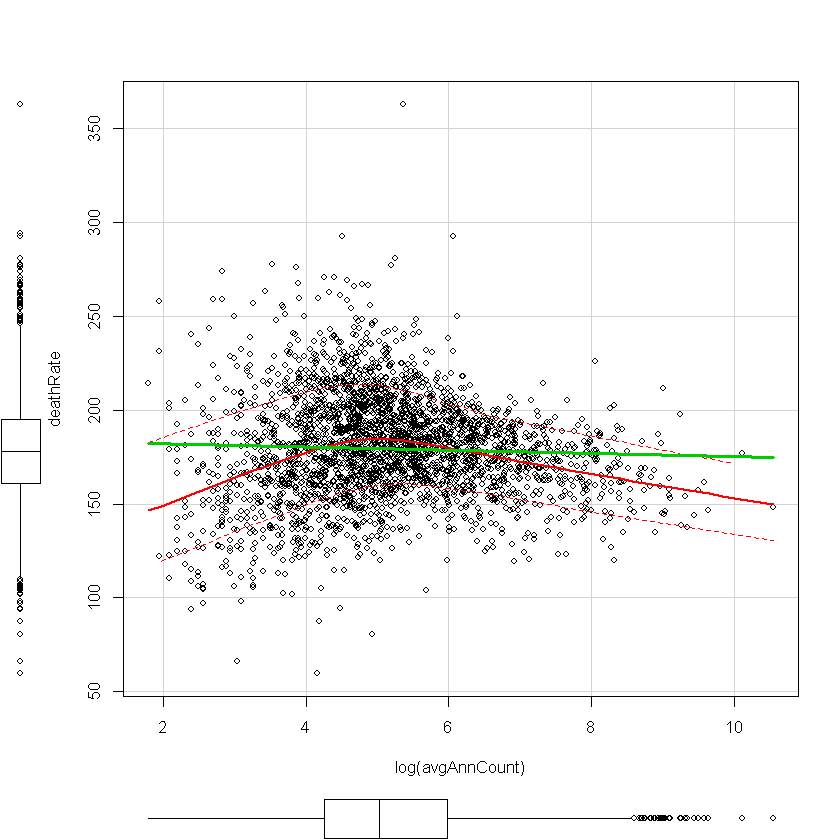

In [151]:
cor(cancer.df$deathRate, log(cancer.df$avgAnnCount), use = "complete.obs")
scatterplot(deathRate ~ log(avgAnnCount), span=0.7, lwd=3, id.n=0, data=cancer.df)

[1] -0.07062112

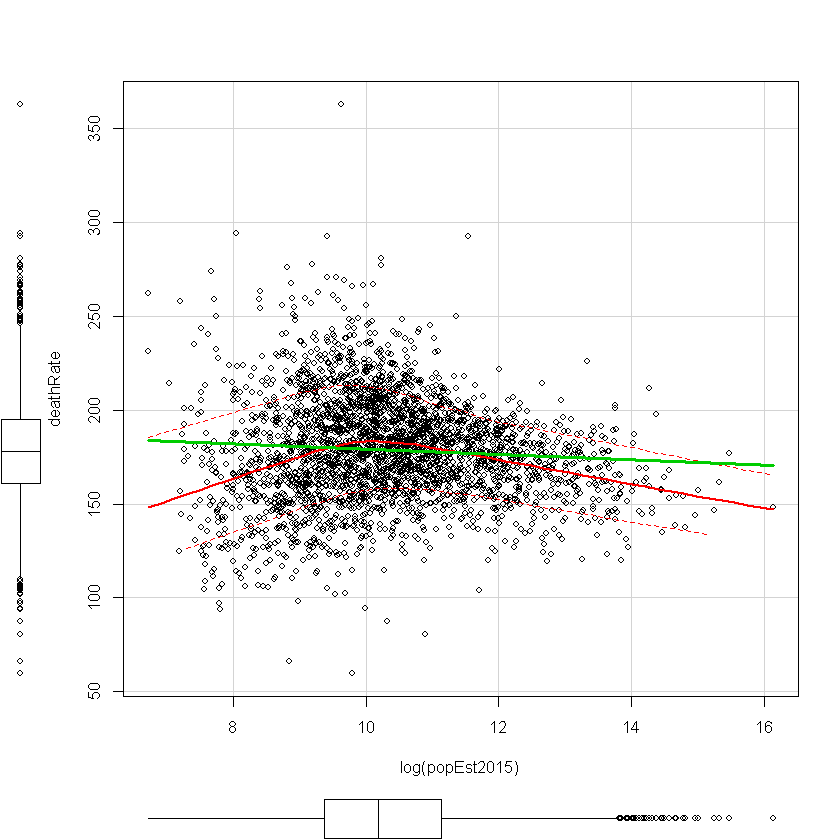

In [157]:
cor(cancer.df$deathRate, log(cancer.df$popEst2015), use = "complete.obs")
scatterplot(deathRate ~ log(popEst2015), span=0.7, lwd=3, id.n=0, data=cancer.df)

[1] 0.985634

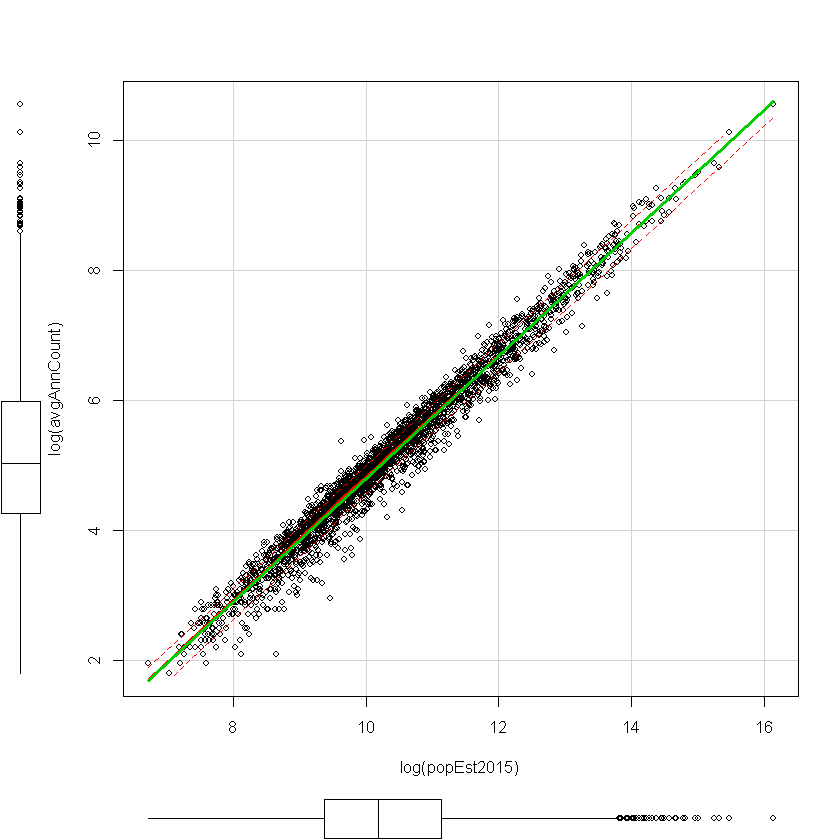

In [154]:
cor(log(cancer.df$popEst2015), log(cancer.df$avgAnnCount), use = "complete.obs")
scatterplot(log(avgAnnCount) ~ log(popEst2015), span=0.7, lwd=3, id.n=0, data=cancer.df)

[1] "[6.71,8.06]" "(8.06,9.41]" "(9.41,10.8]" "(10.8,12.1]" "(12.1,13.4]"
[6] "(13.4,14.8]" "(14.8,16.1]"

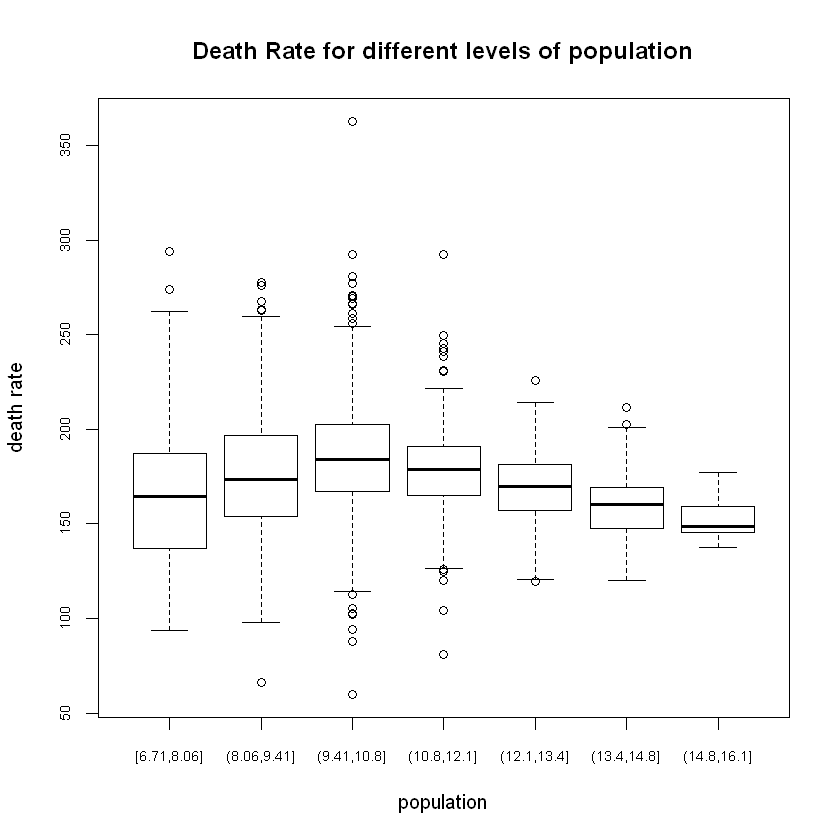

In [171]:
levels(cut(log(cancer.df$popEst2015), 7, include.lowest=TRUE))
boxplot(deathRate ~ cut(log(popEst2015), 7, include.lowest=TRUE), 
        data = cancer.df,
        cex.axis = .7,
        main = "Death Rate for different levels of population",
        xlab = "population", ylab = "death rate")

[1] "[1.78,3.04]" "(3.04,4.29]" "(4.29,5.54]" "(5.54,6.8]"  "(6.8,8.05]" 
[6] "(8.05,9.3]"  "(9.3,10.6]"

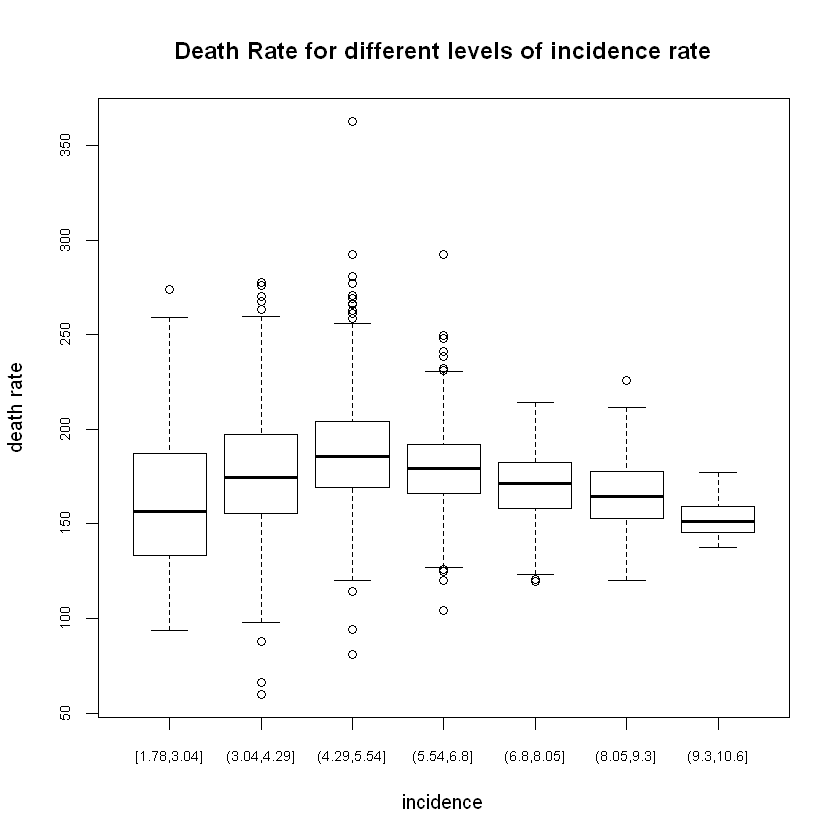

In [164]:
levels(cut(log(cancer.df$avgAnnCount), 7, include.lowest=TRUE))
boxplot(deathRate ~ cut(log(avgAnnCount), 7, include.lowest=TRUE), 
        data = cancer.df,
        cex.axis = .7,
        main = "Death Rate for different levels of incidence rate",
        xlab = "incidence", ylab = "death rate")

[1] "[6.71,8.06]" "(8.06,9.41]" "(9.41,10.8]" "(10.8,12.1]" "(12.1,13.4]"
[6] "(13.4,14.8]" "(14.8,16.1]"

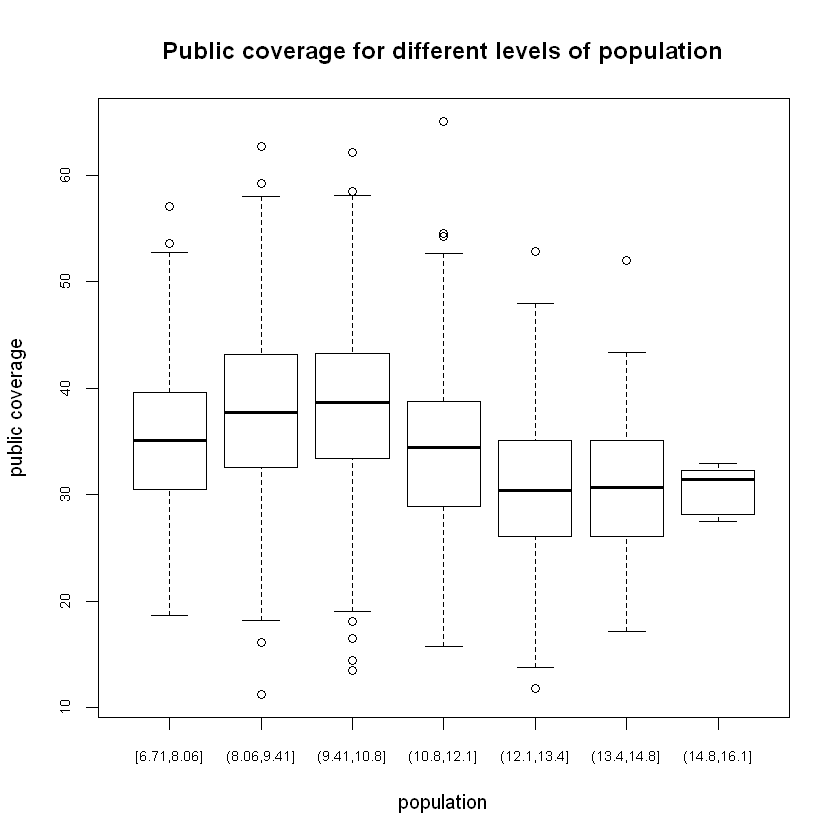

In [167]:
levels(cut(log(cancer.df$popEst2015), 7, include.lowest=TRUE))
boxplot(PctPublicCoverage ~ cut(log(popEst2015), 7, include.lowest=TRUE), 
        data = cancer.df,
        cex.axis = .7,
        main = "Public coverage for different levels of population",
        xlab = "population", ylab = "public coverage")

<h2>Conclusion</h2>